<a href="https://colab.research.google.com/github/INFINITY-RUBER/Curso_Deep_Learning_Con_TernsorFlow_Machine-Learning_e_IA-/blob/master/scripts/tema07/03-iris-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#pip install tensorflow==1.14

# Predicción de la Longitud de Pétalo de Iris

![Descripción](https://github.com/INFINITY-RUBER/Curso_Deep_Learning_Con_TernsorFlow_Machine-Learning_e_IA-/blob/master/resources/08-nn.png?raw=1)

In [0]:
import matplotlib.pyplot as plt   
import numpy as np
import tensorflow as tf
from sklearn import datasets

In [0]:
# cargamos data set de iris
iris =datasets.load_iris()

In [189]:
print(type(iris))

<class 'sklearn.utils.Bunch'>


In [0]:
x_vals = np.array([x[0:3] for x in iris.data])# valores de x de las colunas 1 a 3
y_vals = np.array([x[3] for x in iris.data])# colunna 4 como valor de Y

In [0]:
session = tf.Session()

In [0]:
# creo las variables con la semilla
seed = 19 # semilla
tf.set_random_seed(seed)
np.random.seed(seed)

In [0]:
train_idx = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)# tomo el 80 %
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx))) # tomo el restantes

In [0]:
# Datos de entrenamiento y Testing
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]

In [0]:
def normalize_col(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min)/(col_max-col_min)

In [196]:
# datos sin normalizar
print(x_vals_train[0:4])

[[4.7 3.2 1.3]
 [6.8 3.  5.5]
 [5.5 2.6 4.4]
 [5.6 3.  4.1]]


In [0]:
# Normalizo los valores para que esten entre (0 - 1)
x_vals_train = np.nan_to_num(normalize_col(x_vals_train))
x_vals_test = np.nan_to_num(normalize_col(x_vals_test))

In [198]:
# datos sin normalizar
print(x_vals_train[0:4])

[[0.11111111 0.5        0.03448276]
 [0.69444444 0.4        0.75862069]
 [0.33333333 0.2        0.56896552]
 [0.36111111 0.4        0.51724138]]


In [0]:
# Defino los tensores Pleceholder
batch_size = 50
x_data = tf.placeholder(shape = [None, 3], dtype = tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)

In [0]:
# Defino variables de Entrada
hidden_layer_nodes = 5 # Declaro el Numero de nodos de la red neuronal
A1 = tf.Variable(tf.random_normal(shape=[3, hidden_layer_nodes])) # 3 entradas (Sepal Length, Sepal Width, Petal Length) X numero de Nodos
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))# es el vector de ruido que se suma "bias"
# capa de salida:
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes, 1])) # Numero de entradas que son los Nodos y una salida 
b2 = tf.Variable(tf.random_normal(shape=[1]))# el sesgo de ruido que se suma  a la salida "bias"

In [0]:
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))# de la capa de entrada a la capa oculta "(x_data X A1) + b1 "
final_ouput = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2), b2))#  (hidden_output X A2) + b2 , mutiplicamos por la capa oculta

In [0]:
# definimos la funcion de perdida (diferencias al cuadrado)
loss = tf.reduce_mean(tf.square(y_target-final_ouput))

In [0]:
# definimos el gradiante desendente con funcion de perdida muy pequeño
my_optim = tf.train.GradientDescentOptimizer(0.005)
train_step = my_optim.minimize(loss)# minimizar la funcion de perdida

In [0]:
init = tf.global_variables_initializer()
session.run(init)

In [205]:
loss_vect = []
test_loss = []
for i in range(500):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_idx]
    rand_y = np.transpose([y_vals_train[rand_idx]])# los vectores van en Columna por eso se Tranponen
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    
    temp_loss = session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
    loss_vect.append(np.sqrt(temp_loss))
    
    temp_loss_test = session.run(loss, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_loss.append(np.sqrt(temp_loss_test))
    
    if(i+1)%50==0:
        print("Paso # "+str(i+1)+", Loss = "+str(temp_loss))

Paso # 50, Loss = 2.3848002
Paso # 100, Loss = 1.9423999
Paso # 150, Loss = 2.0942
Paso # 200, Loss = 1.8522
Paso # 250, Loss = 2.3314
Paso # 300, Loss = 2.0998
Paso # 350, Loss = 1.8206
Paso # 400, Loss = 2.1161997


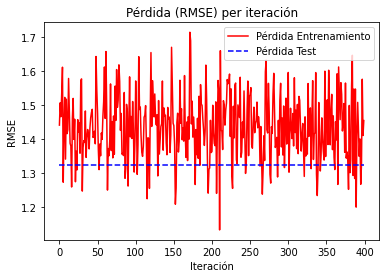

In [206]:
plt.plot(loss_vect, "r-", label="Pérdida Entrenamiento")
plt.plot(test_loss, "b--", label ="Pérdida Test")
plt.title("Pérdida (RMSE) per iteración")
plt.xlabel("Iteración")
plt.ylabel("RMSE")
plt.legend(loc ="upper right")
plt.show()

In [207]:
print(session.run(A1))

[[ 1.9425963   1.2837046  -0.69429195  0.8065384  -0.2550354 ]
 [-0.3324218  -1.5926471   0.31097978  0.09720582  1.8543209 ]
 [ 0.17358676  0.59242195  0.6942563   0.8399697   1.9954697 ]]


In [208]:
print(session.run(b1))

[ 0.4992983  -1.3372735   0.14905064  1.9314767   0.13907292]


In [209]:
print(session.run(A2))

[[-0.3953116 ]
 [ 0.28982052]
 [-1.594295  ]
 [-0.96380204]
 [ 0.11316919]]


In [210]:
print(session.run(b2))

[-1.5000658]
